In [15]:
import pandas as pd
# Reading our data file
heart_data = pd.read_csv("heart.csv")
# try to see the columns of our data to check everything is fine
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [3]:
# our prediction target is 'target' 
y = heart_data.target

# our features are all columns but the target
heart_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = heart_data[heart_features]

# let's see our data or some of it
X.describe()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
# we will use Scikit-learn, which is easily the most popular library for modeling the types of data typically stored in DataFrames.
from sklearn.model_selection import train_test_split

# first , we will split our data into: training and validation data.
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 1 , test_size = 0.30)

In [5]:
# after splitting our data , now let us use the training data to build our model  
from sklearn.tree import DecisionTreeClassifier

# Define the model
heart_model = DecisionTreeClassifier()

# Fit the model which where the model Capture patterns from provided data (creating the decision tree model).
heart_model = heart_model.fit(train_X, train_y)

# the result of our model prediction after trainig it
# print(heart_model.predict(train_X))
print(heart_model.predict(test_X))

[0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1]


Before solving the overfit:

              precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



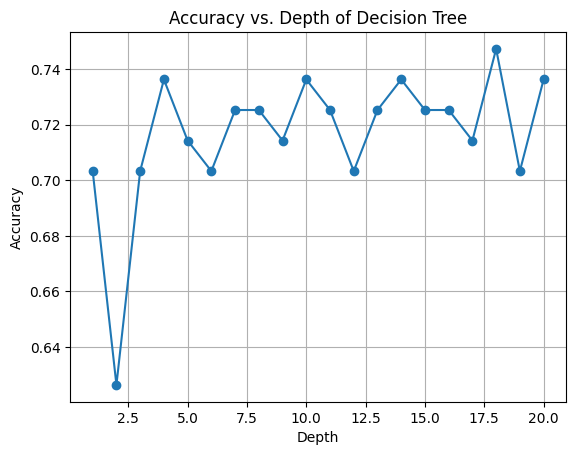

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#testing before solving the overfit
print("Before solving the overfit:\n")
pred=heart_model.predict(test_X)
print(classification_report(test_y, pred))

# Accuracy vs alpha plot
depths = range(1, 21)  # Range of alpha values to try
accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(train_X, train_y)
    accuracies.append(model.score(test_X, test_y))

plt.plot(depths, accuracies, marker='o')
plt.title('Accuracy vs. Depth of Decision Tree')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [25]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Before solving the overfit:

		precision		f1			recall
macro		0.7381528046421664	0.7359767891682785	0.7402439024390244
micro		0.7362637362637363	0.7362637362637363	0.7362637362637363
weighted	0.7438200097774565	0.7368376304546518	0.7362637362637363
multi_samples	[0.68085106 0.79545455]	[0.72727273 0.74468085]	[0.72727273 0.74468085]
average		0.7216533466533466	[0.72727273 0.74468085]	[0.7804878 0.7      ]


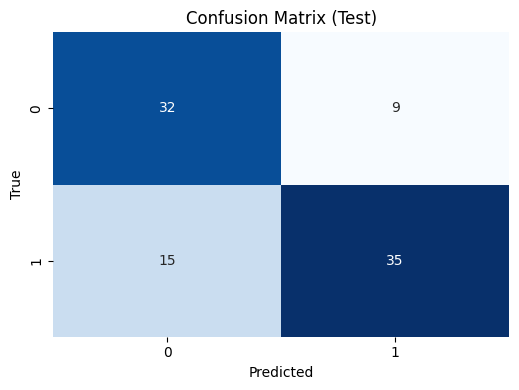

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
print("Before solving the overfit:\n")
precision_macro = precision_score(test_y, pred, average='macro')
precision_micro = precision_score(test_y, pred, average='micro')
precision_weighted = precision_score(test_y, pred, average='weighted')
precision_multi_samples = precision_score(test_y, pred, average=None)
precision_average = average_precision_score(test_y, pred)

f1_macro = f1_score(test_y, pred, average='macro')
f1_micro = f1_score(test_y, pred, average='micro')
f1_weighted = f1_score(test_y, pred, average='weighted')
f1_multi_samples = f1_score(test_y, pred, average=None)
f1_average = f1_score(test_y,pred, average=None)

recall_marco = recall_score(test_y, pred, average='macro')
recall_micro = recall_score(test_y, pred, average='micro')
recall_weighted =recall_score(test_y, pred, average='weighted')
recall_multi_samples= recall_score(test_y, pred, average=None)
recall_average = recall_score(test_y, pred, average=None)

print("\t\tprecision\t\tf1\t\t\trecall")
print("macro\t\t{}\t{}\t{}".format(precision_macro,f1_macro,recall_marco))
print("micro\t\t{}\t{}\t{}".format(precision_micro,f1_micro,recall_micro))
print("weighted\t{}\t{}\t{}".format(precision_weighted,f1_weighted,recall_weighted))
print("multi_samples\t{}\t{}\t{}".format(precision_multi_samples,f1_multi_samples,f1_multi_samples))
print("average\t\t{}\t{}\t{}".format(precision_average,f1_average,recall_average))

# Plot confusion matrices
test_cm = confusion_matrix(test_y, pred, labels=[0,1])

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

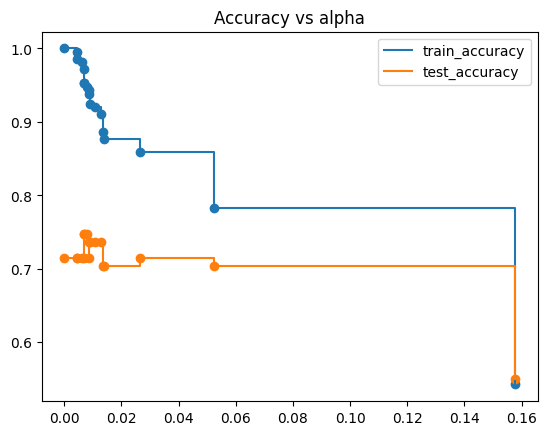

Train score: 0.9528301886792453
Test score: 0.7472527472527473


<Figure size 1000x400 with 0 Axes>

In [27]:
#train_X, test_X, train_y, test_y

# Calculate the cost-complexity pruning path
path = DecisionTreeClassifier().cost_complexity_pruning_path(train_X, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# For each alpha, train and evaluate the model
clfs = []
train_acc = []
test_acc = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(train_X, train_y)
    clfs.append(clf)
    y_train_pred = clf.predict(train_X)
    y_test_pred = clf.predict(test_X)
    train_acc.append(accuracy_score(y_train_pred, train_y))
    test_acc.append(accuracy_score(y_test_pred, test_y))

# Plotting accuracy vs alpha
plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas, test_acc)
plt.plot(ccp_alphas, train_acc, label='train_accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_acc, label='test_accuracy', drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

# Choose the model with the optimal alpha
best_alpha = ccp_alphas[test_acc.index(max(test_acc))]
clf_best = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf_best.fit(train_X, train_y)

# Evaluate the best model on train and test data
y_train_pred = clf_best.predict(train_X)
y_test_pred = clf_best.predict(test_X)

print(f'Train score: {accuracy_score(y_train_pred, train_y)}')
print(f'Test score: {accuracy_score(y_test_pred, test_y)}')

plt.figure(figsize=(10, 4))

plt.tight_layout()
plt.show()

In [36]:
#testing after solving the overfit
print("After solving the overfit:\n")
pred=heart_model.predict(test_X)
print(classification_report(y_test_pred, test_y))

After solving the overfit:

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        46
           1       0.72      0.80      0.76        45

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



After solving the overfit:

		precision		f1			recall
macro		0.7502439024390244	0.7467634603750757	0.7478260869565218
micro		0.7472527472527473	0.7472527472527473	0.7472527472527473
weighted	0.7505762530152775	0.7466411386556577	0.7472527472527473
multi_samples	[0.7804878 0.72     ]	[0.73563218 0.75789474]	[0.73563218 0.75789474]
average		0.6749010989010988	[0.73563218 0.75789474]	[0.69565217 0.8       ]


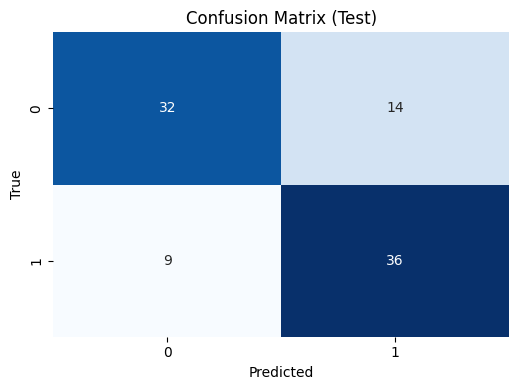

In [37]:
#testing after solving the overfit
print("After solving the overfit:\n")
precision_macro = precision_score(y_test_pred, test_y, average='macro')
precision_micro = precision_score(y_test_pred, test_y, average='micro')
precision_weighted = precision_score(y_test_pred, test_y, average='weighted')
precision_multi_samples = precision_score(y_test_pred, test_y, average=None)
precision_average = average_precision_score(y_test_pred, test_y)

f1_macro = f1_score(y_test_pred, test_y, average='macro')
f1_micro = f1_score(y_test_pred, test_y, average='micro')
f1_weighted = f1_score(y_test_pred, test_y, average='weighted')
f1_multi_samples = f1_score(y_test_pred, test_y, average=None)
f1_average = f1_score(y_test_pred,test_y, average=None)

recall_marco = recall_score(y_test_pred, test_y, average='macro')
recall_micro = recall_score(y_test_pred, test_y, average='micro')
recall_weighted =recall_score(y_test_pred, test_y, average='weighted')
recall_multi_samples= recall_score(y_test_pred, test_y, average=None)
recall_average = recall_score(y_test_pred, test_y, average=None)

print("\t\tprecision\t\tf1\t\t\trecall")
print("macro\t\t{}\t{}\t{}".format(precision_macro,f1_macro,recall_marco))
print("micro\t\t{}\t{}\t{}".format(precision_micro,f1_micro,recall_micro))
print("weighted\t{}\t{}\t{}".format(precision_weighted,f1_weighted,recall_weighted))
print("multi_samples\t{}\t{}\t{}".format(precision_multi_samples,f1_multi_samples,f1_multi_samples))
print("average\t\t{}\t{}\t{}".format(precision_average,f1_average,recall_average))

# Plot confusion matrices
test_cm = confusion_matrix(y_test_pred, test_y)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

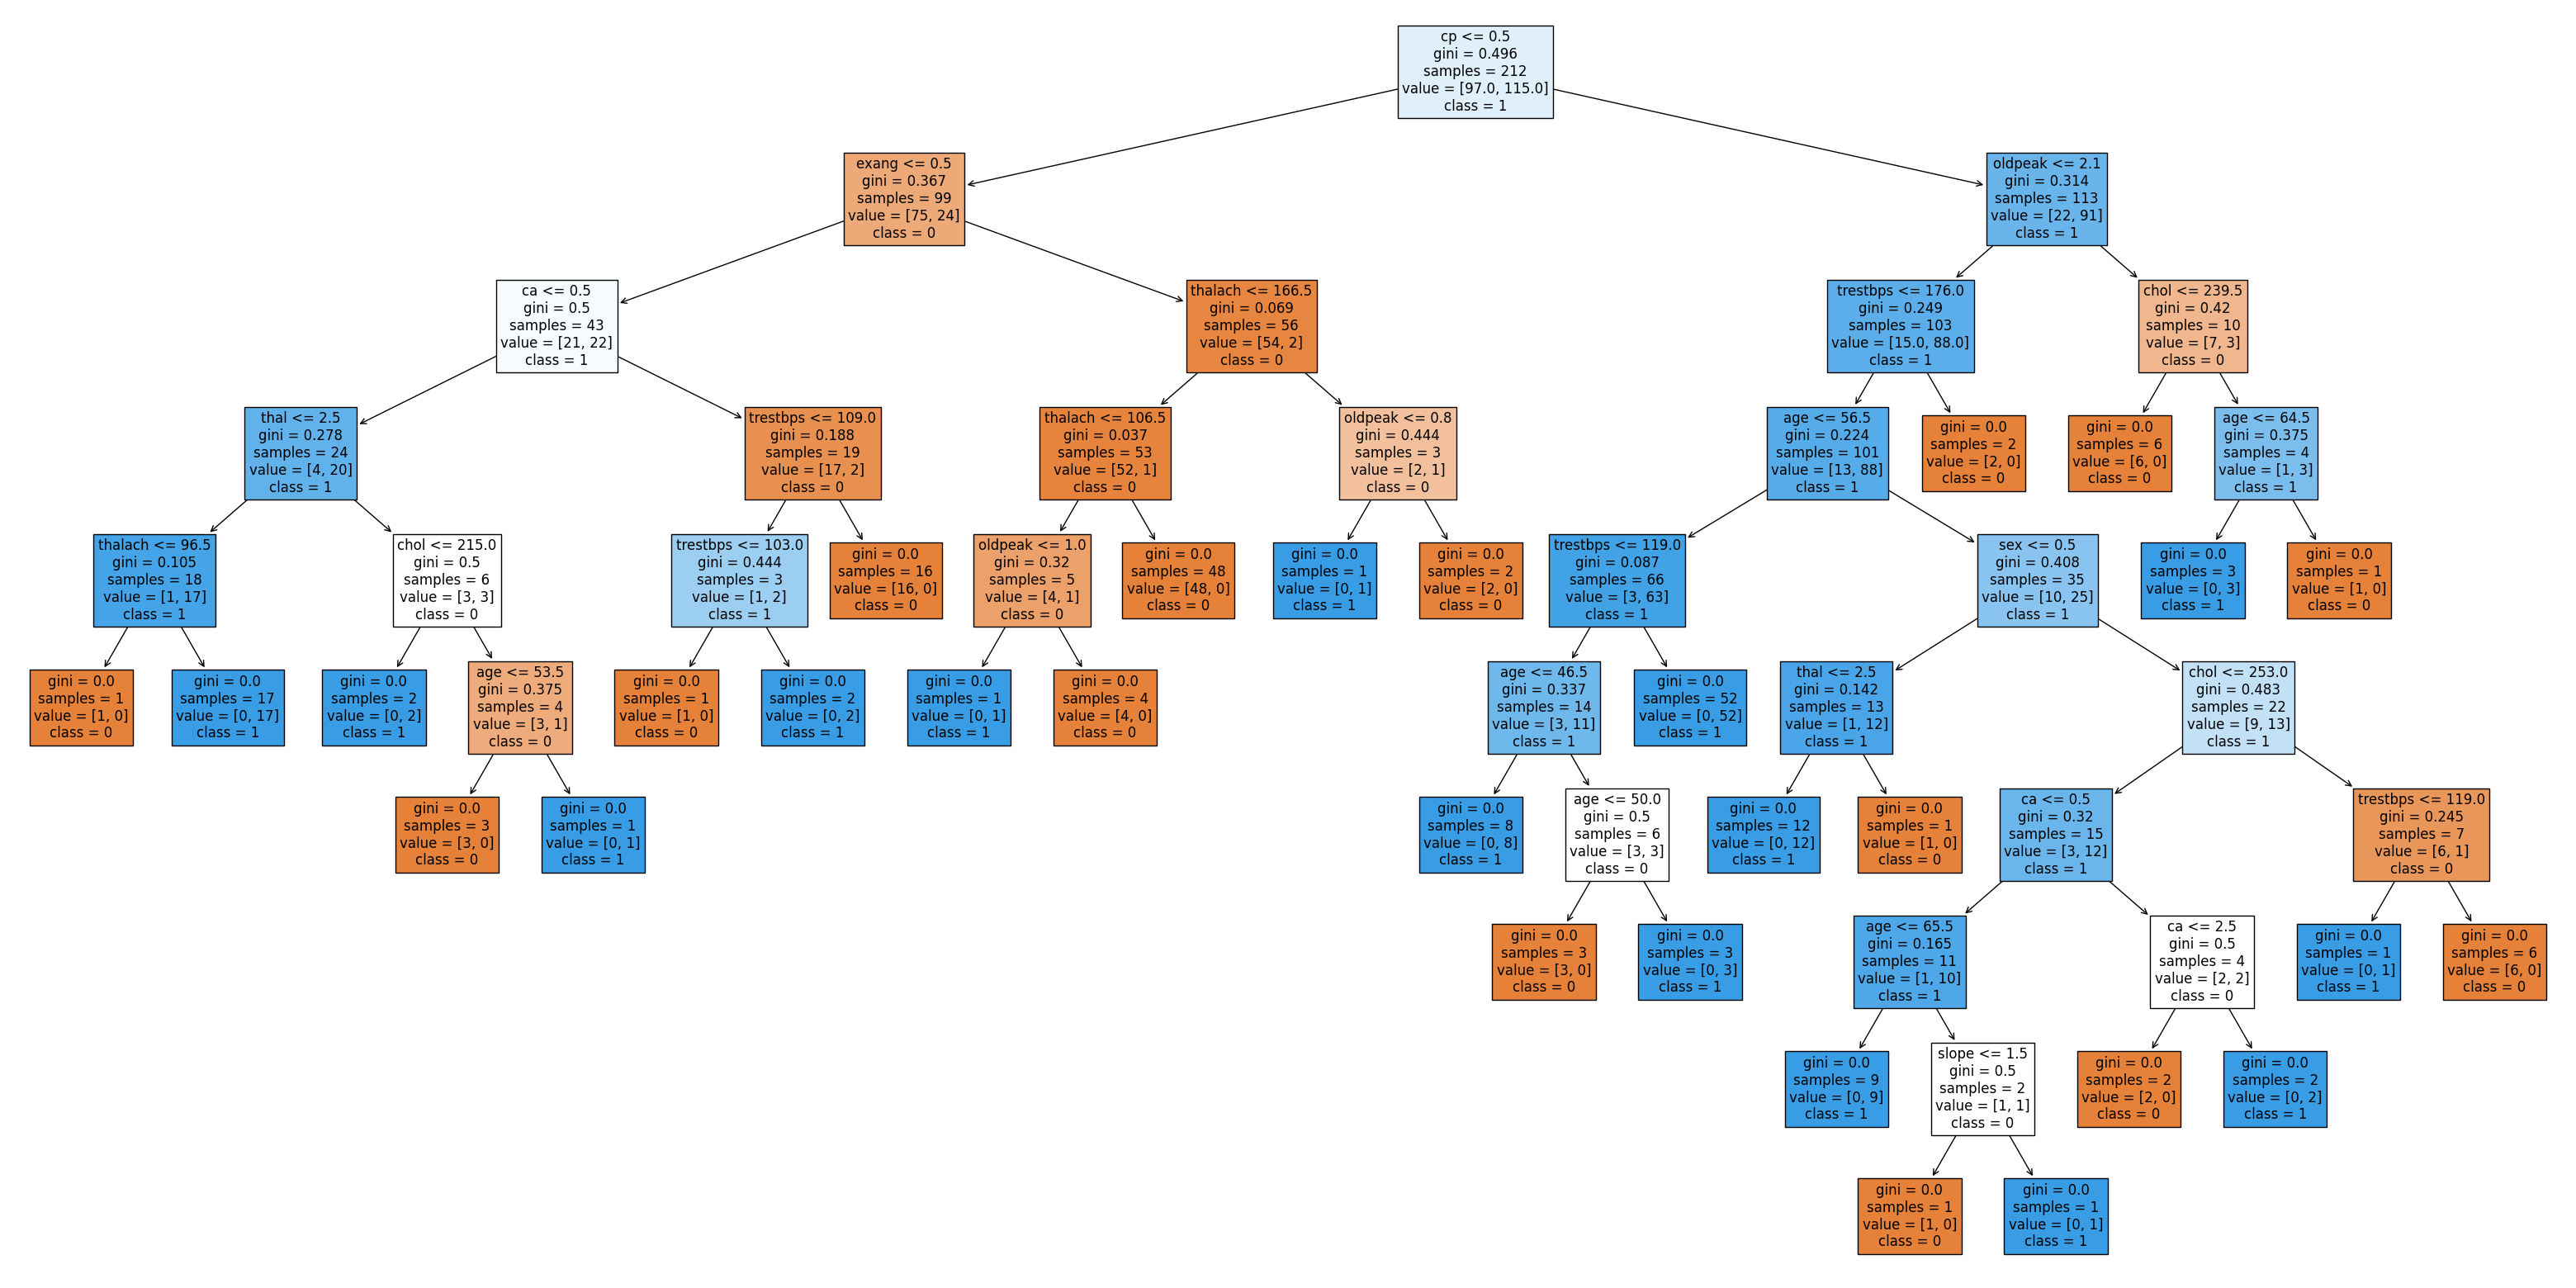

In [20]:
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(heart_model, 
                   feature_names=heart_data.columns,  
                   class_names={0:'0', 1:'1'},
                   filled=True,
                  fontsize=12)